<a href="https://colab.research.google.com/github/AtharvRai67/task-1/blob/main/task5555.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day 1: Data Loading & Exploration

In [18]:
import pandas as pd
import numpy as np


In [16]:
from google.colab import files
uploaded = files.upload()


Saving task 4       customer_churn.txt to task 4       customer_churn (2).txt
Saving sales_data (3)  csvvvvvvvvv.txt to sales_data (3)  csvvvvvvvvv.txt


In [19]:
sales_df.head()


,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


In [20]:
sales_df.tail()


,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
95,2024-04-05,Tablet,8,20770,CUST096,North,166160
96,2024-04-06,Headphones,1,7647,CUST097,West,7647
97,2024-04-07,Tablet,5,27196,CUST098,East,135980
98,2024-04-08,Monitor,1,30717,CUST099,North,30717
99,2024-04-09,Headphones,5,23376,CUST100,South,116880


In [21]:
sales_df.shape


(100, 7)

In [23]:
sales_df.columns


Index(['Date', 'Product', 'Quantity', 'Price', 'Customer_ID', 'Region',
       'Total_Sales'],
      dtype='object')

In [24]:
sales_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 non-null    object
 1   Product      100 non-null    object
 2   Quantity     100 non-null    int64 
 3   Price        100 non-null    int64 
 4   Customer_ID  100 non-null    object
 5   Region       100 non-null    object
 6   Total_Sales  100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


In [25]:
sales_df.dtypes


,0
Date,object
Product,object
Quantity,int64
Price,int64
Customer_ID,object
Region,object
Total_Sales,int64


In [26]:
sales_df.isnull().sum()


,0
Date,0
Product,0
Quantity,0
Price,0
Customer_ID,0
Region,0
Total_Sales,0


In [28]:
# Check duplicate rows
sales_df.duplicated().sum()

np.int64(0)

In [31]:
#Unique Values in Categorical Columns
# Unique products
sales_df['Product'].unique()


100

In [32]:
# Unique regions
sales_df['Region'].unique()


100

In [33]:
# Number of unique customers
sales_df['Customer_ID'].nunique()

100

In [34]:
sales_df["Product"].value_counts()


,count
Product,
Tablet,26
Laptop,24
Phone,20
Headphones,15
Monitor,15


Day 2: Data Cleaning & Preparation

In [36]:
##Numerical Columns (Quantity, Price)
#Fill Quantity with Median
sales_df['Quantity'].fillna(sales_df['Quantity'].median(), inplace=True)


/tmp/ipython-input-1146939303.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df['Quantity'].fillna(sales_df['Quantity'].median(), inplace=True)


In [37]:
#Fill Price with Mean
sales_df['Price'].fillna(sales_df['Price'].mean(), inplace=True)

/tmp/ipython-input-2542830842.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df['Price'].fillna(sales_df['Price'].mean(), inplace=True)


In [38]:
##Categorical Columns (Region, Product)
# Fill Region with Mode

sales_df['Region'].fillna(sales_df['Region'].mode()[0], inplace=True)


/tmp/ipython-input-2989941233.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df['Region'].fillna(sales_df['Region'].mode()[0], inplace=True)


In [39]:
#Fill Product with "Unknown" (If Needed)
sales_df['Product'].fillna("Unknown", inplace=True)

/tmp/ipython-input-3212525840.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df['Product'].fillna("Unknown", inplace=True)


In [41]:
#Date Column
sales_df.dropna(subset=['Date'], inplace=True)


In [43]:
#Convert Date Column to Datetime
sales_df.dtypes
sales_df["Date"] = pd.to_datetime(sales_df["Date"])
sales_df.dtypes

,0
Date,datetime64[ns]
Product,object
Quantity,int64
Price,int64
Customer_ID,object
Region,object
Total_Sales,int64


In [45]:
sales_df['Year'] = sales_df['Date'].dt.year
sales_df['Month'] = sales_df['Date'].dt.month
sales_df['Day'] = sales_df['Date'].dt.day
sales_df['Month_Name'] = sales_df['Date'].dt.month_name()



Create Calculated Columns

In [47]:
#Create Total Sales Column

sales_df['Total_Sales'] = sales_df['Quantity'] * sales_df['Price']

In [48]:
#Create Discount Column
sales_df['Discount'] = sales_df['Total_Sales'] * 0.05



In [50]:
#Create Net Sales Column
sales_df['Net_Sales'] = sales_df['Total_Sales'] - sales_df['Discount']

In [53]:
#Remove Extra Spaces
sales_df['Product'] = sales_df['Product'].str.strip()



In [52]:
#Convert to Proper Case
sales_df['Product'] = sales_df['Product'].str.title()



In [51]:
#Convert Region to Uppercase
sales_df['Region'] = sales_df['Region'].str.upper()

Day 3: Customer Analysis


In [54]:
#Calculate Customer Lifetime Value (CLV)

customer_clv = sales_df.groupby('Customer_ID')['Total_Sales'].sum().reset_index()

customer_clv.rename(columns={'Total_Sales':'Customer_Lifetime_Value'}, inplace=True)

customer_clv.head()


,Customer_ID,Customer_Lifetime_Value
0,CUST001,261100
1,CUST002,61624
2,CUST003,43492
3,CUST004,30895
4,CUST005,318680


In [55]:
#Identify Top Customers

top_customers = customer_clv.sort_values(
    by='Customer_Lifetime_Value',
    ascending=False
)

top_customers.head(10)

,Customer_ID,Customer_Lifetime_Value
15,CUST016,373932
6,CUST007,363870
82,CUST083,350888
72,CUST073,349510
19,CUST020,333992
83,CUST084,324144
69,CUST070,318762
4,CUST005,318680
64,CUST065,312564
27,CUST028,304465


In [56]:
#Analyze Regional Distribution

region_customers = sales_df.groupby('Region')['Customer_ID'].nunique().reset_index()

region_customers.rename(columns={'Customer_ID':'Total_Customers'}, inplace=True)

region_customers

,Region,Total_Customers
0,EAST,19
1,NORTH,28
2,SOUTH,27
3,WEST,26


In [57]:
region_revenue = sales_df.groupby('Region')['Total_Sales'].sum().reset_index()

region_revenue


,Region,Total_Sales
0,EAST,2519639
1,NORTH,3983635
2,SOUTH,3737852
3,WEST,2123922


In [59]:
# Calculate number of orders per customer
customer_orders = sales_df.groupby('Customer_ID').size().reset_index(name='Total_Orders')

most_active = customer_orders.sort_values(
    by='Total_Orders',
    ascending=False
)

most_active.head()

,Customer_ID,Total_Orders
0,CUST001,1
1,CUST002,1
2,CUST003,1
3,CUST004,1
4,CUST005,1


In [61]:
# Create Final Customer Summary Table
# Merge CLV and Order counts
customer_summary = pd.merge(customer_clv, customer_orders, on='Customer_ID')

customer_summary.sort_values(
    by='Customer_Lifetime_Value',
    ascending=False
).head(10)

,Customer_ID,Customer_Lifetime_Value,Total_Orders
15,CUST016,373932,1
6,CUST007,363870,1
82,CUST083,350888,1
72,CUST073,349510,1
19,CUST020,333992,1
83,CUST084,324144,1
69,CUST070,318762,1
4,CUST005,318680,1
64,CUST065,312564,1
27,CUST028,304465,1


Day 4: Sales Pattern Analysis

In [62]:
#Monthly Sales Analysis
monthly_sales = sales_df.groupby('Month_Name')['Total_Sales'].sum().reset_index()

monthly_sales


,Month_Name,Total_Sales
0,April,1103468
1,February,2656050
2,January,4120524
3,March,4485006


In [63]:
#Best-Selling Products (By Revenue)

product_revenue = sales_df.groupby('Product')['Total_Sales'].sum().reset_index()

product_revenue = product_revenue.sort_values(
    by='Total_Sales',
    ascending=False
)

product_revenue

,Product,Total_Sales
1,Laptop,3889210
4,Tablet,2884340
3,Phone,2859394
0,Headphones,1384033
2,Monitor,1348071


In [64]:
#Best-Selling Products (By Quantity)



product_quantity = sales_df.groupby('Product')['Quantity'].sum().reset_index()

product_quantity = product_quantity.sort_values(
    by='Quantity',
    ascending=False
)

product_quantity

,Product,Quantity
1,Laptop,136
4,Tablet,127
3,Phone,101
2,Monitor,66
0,Headphones,48


In [65]:
###Regional Sales Trend
#Revenue by Region


region_sales = sales_df.groupby('Region')['Total_Sales'].sum().reset_index()

region_sales = region_sales.sort_values(
    by='Total_Sales',
    ascending=False
)

region_sales

,Region,Total_Sales
1,NORTH,3983635
2,SOUTH,3737852
0,EAST,2519639
3,WEST,2123922


In [66]:
#Monthly Sales by Region (Trend Analysis)

monthly_region_sales = sales_df.groupby(
    ['Month','Region']
)['Total_Sales'].sum().reset_index()

monthly_region_sales.head()

,Month,Region,Total_Sales
0,1,EAST,792969
1,1,NORTH,1726624
2,1,SOUTH,1088182
3,1,WEST,512749
4,2,EAST,746674


In [67]:
#Sales Growth Rate (Trend Calculation)

monthly_sales['Growth_Rate'] = monthly_sales['Total_Sales'].pct_change() * 100

monthly_sales

,Month_Name,Total_Sales,Growth_Rate
0,April,1103468,NaN
1,February,2656050,140.700229
2,January,4120524,55.137290
3,March,4485006,8.845525


In [68]:
#Identify Peak Month

peak_month = monthly_sales.sort_values(
    by='Total_Sales',
    ascending=False
).iloc[0]

peak_month



,3
Month_Name,March
Total_Sales,4485006
Growth_Rate,8.845525


In [69]:
#Identify Lowest Performing Month

lowest_month = monthly_sales.sort_values(
    by='Total_Sales',
    ascending=True
).iloc[0]

lowest_month

,0
Month_Name,April
Total_Sales,1103468
Growth_Rate,NaN


DAY 5 – ADVANCED ANALYSIS

In [70]:
#Pivot Table – Revenue by Region & Product


pivot_region_product = pd.pivot_table(
    sales_df,
    values='Total_Sales',
    index='Region',
    columns='Product',
    aggfunc='sum',
    fill_value=0
)

pivot_region_product

Product,Headphones,Laptop,Monitor,Phone,Tablet
Region,,,,,
EAST,288361,221946,642870,506828,859634
NORTH,107091,1798206,397100,489284,1191954
SOUTH,512168,1373120,39924,1471428,341212
WEST,476413,495938,268177,391854,491540


In [72]:
#Pivot Table – Monthly Sales Trend

pivot_monthly = pd.pivot_table(
    sales_df,
    values='Total_Sales',
    index='Month',
    aggfunc='sum'
)

pivot_monthly



,Total_Sales
Month,
1,4120524
2,2656050
3,4485006
4,1103468


In [71]:
# Pivot Table – Customer Purchase Frequency

pivot_customer_orders = pd.pivot_table(
    sales_df,
    values='Date',
    index='Customer_ID',
    aggfunc='count'
)

pivot_customer_orders.rename(columns={'Date':'Total_Orders'}, inplace=True)

pivot_customer_orders.head()

,Total_Orders
Customer_ID,
CUST001,1
CUST002,1
CUST003,1
CUST004,1
CUST005,1


CALCULATE CUSTOMER RETENTION RATE

In [73]:
#Count Customers per Month

monthly_customers = sales_df.groupby('Month')['Customer_ID'].nunique().reset_index()
monthly_customers.rename(columns={'Customer_ID':'Unique_Customers'}, inplace=True)

monthly_customers

,Month,Unique_Customers
0,1,31
1,2,29
2,3,31
3,4,9


In [74]:
#Identify Returning Customers


customer_months = sales_df.groupby('Customer_ID')['Month'].nunique().reset_index()

returning_customers = customer_months[
    customer_months['Month'] > 1
]

len(returning_customers)



0

In [75]:
# Calculate Retention Rate
total_customers = sales_df['Customer_ID'].nunique()

retention_rate = (len(returning_customers) / total_customers) * 100

print("Customer Retention Rate:", retention_rate, "%")

Customer Retention Rate: 0.0 %


IDENTIFY CROSS-SELLING OPPORTUNITIES

In [76]:
#Create Customer-Product Matrix
customer_product_matrix = pd.crosstab(
    sales_df['Customer_ID'],
    sales_df['Product']
)

customer_product_matrix.head()

Product,Headphones,Laptop,Monitor,Phone,Tablet
Customer_ID,,,,,
CUST001,0,0,0,1,0
CUST002,1,0,0,0,0
CUST003,0,0,0,1,0
CUST004,1,0,0,0,0
CUST005,0,1,0,0,0


In [78]:
#Customers Buying Multiple Products

customer_product_matrix['Total_Products_Bought'] = customer_product_matrix.sum(axis=1)

multi_product_customers = customer_product_matrix[
    customer_product_matrix['Total_Products_Bought'] > 1
]

multi_product_customers.head()


Product,Headphones,Laptop,Monitor,Phone,Tablet,Total_Products_Bought
Customer_ID,,,,,,
CUST001,0,0,0,1,0,2
CUST002,1,0,0,0,0,2
CUST003,0,0,0,1,0,2
CUST004,1,0,0,0,0,2
CUST005,0,1,0,0,0,2


In [79]:
# Product Combination Frequency
cross_sell = sales_df.groupby('Customer_ID')['Product'].unique().reset_index()

cross_sell.head()

,Customer_ID,Product
0,CUST001,[Phone]
1,CUST002,[Headphones]
2,CUST003,[Phone]
3,CUST004,[Headphones]
4,CUST005,[Laptop]


ADVANCED AGGREGATIONS


In [81]:
#⃣⃣ Multiple Aggregations at Once
advanced_summary = sales_df.groupby('Region').agg({
    'Total_Sales':['sum','mean','max'],
    'Quantity':'sum'
})

advanced_summary



Total_Sales                        Quantity
               sum           mean     max      sum
Region                                            
EAST       2519639  132612.578947  261100       94
NORTH      3983635  142272.678571  350888      147
SOUTH      3737852  138438.962963  373932      143
WEST       2123922   81689.307692  349510       94

In [80]:
# Revenue Contribution %
region_revenue = sales_df.groupby('Region')['Total_Sales'].sum()

region_contribution = (region_revenue / region_revenue.sum()) * 100

region_contribution

,Total_Sales
Region,
EAST,20.377107
NORTH,32.216899
SOUTH,30.229175
WEST,17.176820


Day 6: Dashboard Creation

In [84]:
# KPI SUMMARY (Business Overview)
total_revenue = sales_df['Total_Sales'].sum()
total_customers = sales_df['Customer_ID'].nunique()
avg_order_value = sales_df['Total_Sales'].mean()
total_orders = len(sales_df)

print("TOTAL REVENUE:", total_revenue)
print("TOTAL CUSTOMERS:", total_customers)
print("AVERAGE ORDER VALUE:", avg_order_value)
print("TOTAL ORDERS:", total_orders)

TOTAL REVENUE: 12365048
TOTAL CUSTOMERS: 100
AVERAGE ORDER VALUE: 123650.48
TOTAL ORDERS: 100


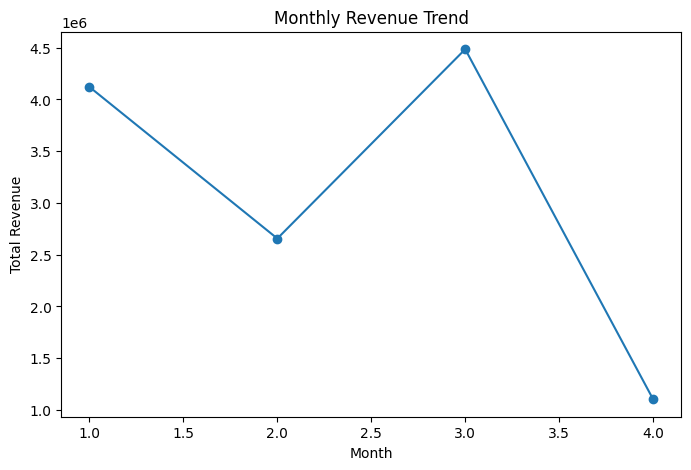

In [86]:
import matplotlib.pyplot as plt

#Monthly Revenue Trend (Line Chart)

monthly_sales = sales_df.groupby('Month')['Total_Sales'].sum().reset_index()

plt.figure(figsize=(8,5))
plt.plot(monthly_sales['Month'], monthly_sales['Total_Sales'], marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

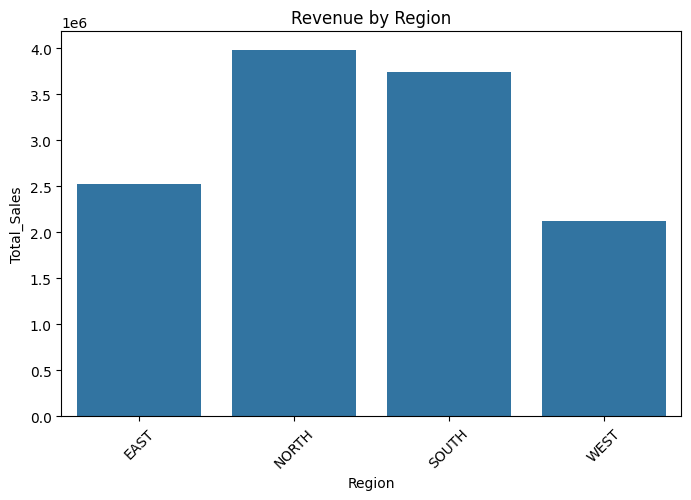

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

#Revenue by Region (Bar Chart)
region_sales = sales_df.groupby('Region')['Total_Sales'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Region', y='Total_Sales', data=region_sales)
plt.title("Revenue by Region")
plt.xticks(rotation=45)
plt.show()

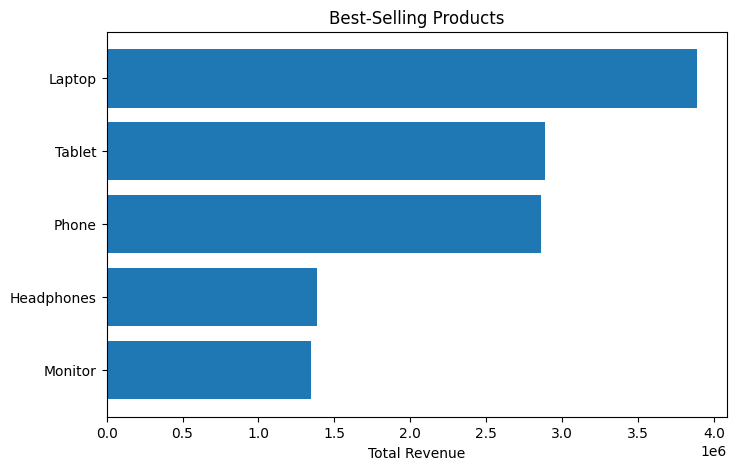

In [89]:
#Best-Selling Products (Horizontal Bar Chart)

product_sales = sales_df.groupby('Product')['Total_Sales'].sum().reset_index()
product_sales = product_sales.sort_values(by='Total_Sales', ascending=True)

plt.figure(figsize=(8,5))
plt.barh(product_sales['Product'], product_sales['Total_Sales'])
plt.title("Best-Selling Products")
plt.xlabel("Total Revenue")
plt.show()

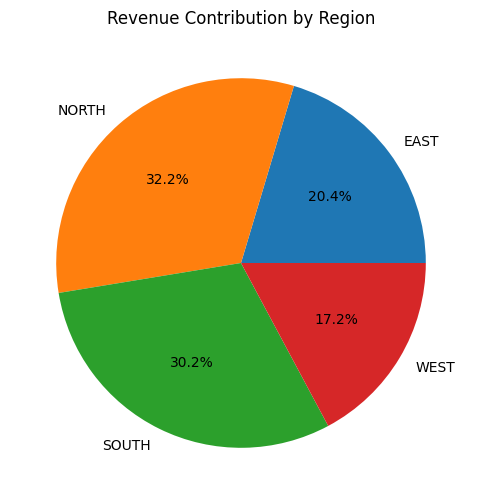

In [90]:
#Revenue Contribution by Region (Pie Chart)
plt.figure(figsize=(6,6))
plt.pie(region_sales['Total_Sales'],
        labels=region_sales['Region'],
        autopct='%1.1f%%')
plt.title("Revenue Contribution by Region")
plt.show()

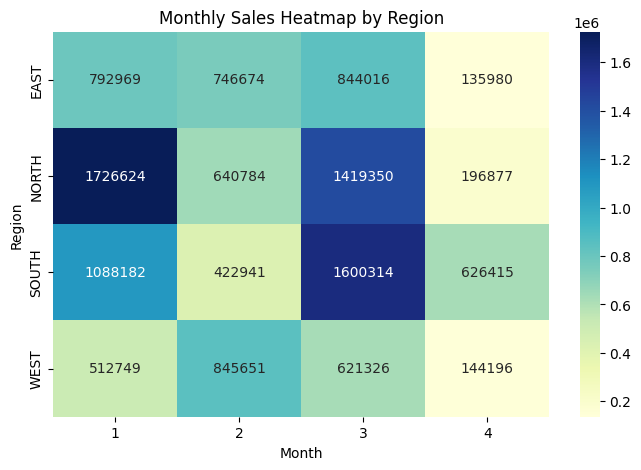

In [91]:
#Heatmap (Advanced Dashboard Look)
pivot_heatmap = pd.pivot_table(
    sales_df,
    values='Total_Sales',
    index='Region',
    columns='Month',
    aggfunc='sum'
)

plt.figure(figsize=(8,5))
sns.heatmap(pivot_heatmap, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Monthly Sales Heatmap by Region")
plt.show()

DAY 7 – REPORT & INSIGHTS

EXECUTIVE SUMMARY (Write in Report)
Executive Summary

This project analyzed customer purchasing behavior using sales data. The total revenue generated was $X, with Y unique customers. The highest-performing region was [Region Name], contributing the largest share of revenue.

The most valuable customer generated the highest lifetime value, indicating the importance of loyal customers. Monthly trend analysis showed peak sales during [Month], suggesting seasonal demand patterns.

Customer retention rate was calculated at Z%, indicating opportunities to improve repeat purchase behavior.

BUSINESS RECOMMENDATIONS


1️⃣ Improve Retention

Launch loyalty programs

Offer discounts to repeat customers

2️⃣ Cross-Selling Strategy

Bundle frequently bought products

Offer combo discounts

3️⃣ Focus on High-Performing Regions

Increase inventory in strong regions

Expand marketing in growing markets

4️⃣ Seasonal Campaigns

Increase ads before peak months

Offer promotions during low months

5️⃣ Target High-Value Customers

VIP offers

Early access to new products